In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 
from IPython.display import clear_output

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (12, 8)

<font size="7">
<center>Theta Problem</center></font>

Reward = 0 for every transition

<img src="images/theta-2theta.png" width="150%" height="150%">


##  __Emphatic TD__

In [4]:
def get_nextState_impRatio(state):
    #right action
    if (np.random.binomial(1,0.5)):
        if state==1:
            return (state, 1.0/0.5)
        else:
            return (state+1, 1.0/0.5)
    else: #left action
        if state==0:
            return (state, 0)
        else:
            return (state-1, 0)        

In [5]:
gammas    = np.array([0,0.9])
interests = np.array([1.0, 0])
Phi       = np.array([1, 2])

alpha = 0.001
nbSteps = 5000
nbRun   = 50

In [13]:
theta_history = np.zeros((nbRun, nbSteps))

for run in range(nbRun):
    state = np.random.choice([0,1])
    e = 0
    F = 0
    imp_ratio = 0
    lambda_t  = 0
    theta = 1.0
    for step in range(nbSteps):
        F = imp_ratio * gammas[state]* F + interests[state]
        M =  lambda_t*interests[state] + (1 - lambda_t)*F

        nextState, imp_ratio = get_nextState_impRatio(state)    

        e = imp_ratio * (gammas[state]*lambda_t*e + M*Phi[state])

        theta += alpha*(0 + gammas[nextState]*theta*Phi[nextState] - theta*Phi[state]) * e

        state = nextState

        theta_history[run][step] = theta

## Problem due to infinite variance

### Finite expected value 

<img src="images/E[F_t].png" width="70%" height="70%">

### But infinite variance 

<img src="images/Var[F_t].png" width="40%" height="40%">

<img src="images/high variance at run 2.png">

## Deterministic emphatic TD(0)

In [15]:
P_pi = np.array([[0,1],
                 [0,1]])
d_mu = np.array([0.5, 0.5])

In [16]:
M = np.diag(np.linalg.inv((np.eye(2) - np.diag(gammas).dot(P_pi.T))).dot(d_mu * interests))

In [17]:
A = Phi[None,:].dot(M).dot(np.eye(2)).dot(np.eye(2) - P_pi.dot(np.diag(gammas)) ).dot(Phi[:,None]) 

In [18]:
theta_hist_expected = np.zeros(nbSteps)
theta = 1.0
for timestep in range(nbSteps):
    theta += alpha * (-A*theta)
    theta_hist_expected[timestep] = theta

## TD(0)

In [19]:
theta_history_td = np.zeros((nbRun, nbSteps))
gamma = 0.9
for run in range(nbRun):
    state = np.random.choice([0,1])  
    imp_ratio = 0    
    theta = 1.0
    for step in range(nbSteps):       
        nextState, imp_ratio = get_nextState_impRatio(state)   

        #theta += alpha*imp_ratio*(0 + gammas[nextState]*theta*Phi[nextState] - theta*Phi[state]) * Phi[state]
        theta += alpha*imp_ratio*(0 + gamma*theta*Phi[nextState] - theta*Phi[state]) * Phi[state]

        state = nextState

        theta_history_td[run][step] = theta

## Deterministic TD(0)

In [20]:
A_td = Phi[None,:].dot(np.diag(d_mu)).dot(np.eye(2) - gamma*(P_pi)).dot(Phi[:,None])

In [21]:
theta_hist_expected_td = np.zeros(nbSteps)
theta = 1.0
for timestep in range(nbSteps):
    theta += alpha * (-A_td*theta)
    theta_hist_expected_td[timestep] = theta

## Algorithms behaviour

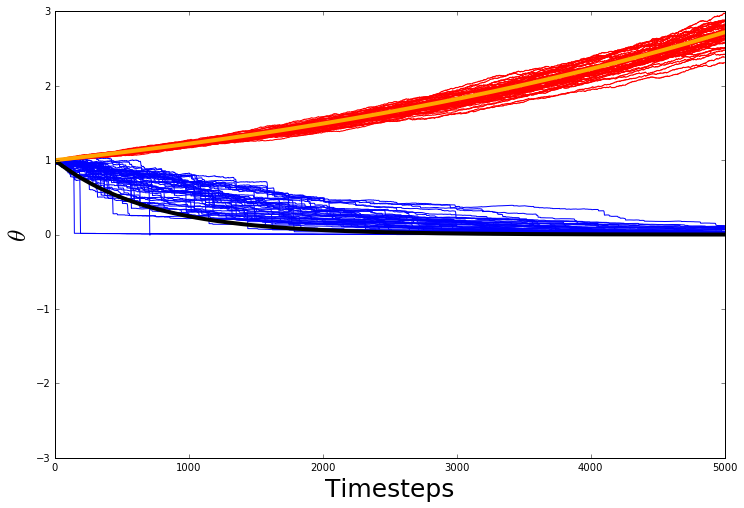

In [22]:
for run in range(nbRun):
    plt.plot(range(nbSteps), theta_history[run], color = 'blue')

plt.plot(range(nbSteps), theta_hist_expected, linewidth = 4.0, color = 'black')

for run in range(nbRun):
    plt.plot(range(nbSteps), theta_history_td[run], color = 'red')
    
plt.plot(range(nbSteps), theta_hist_expected_td, linewidth = 4.0, color = 'orange')
    
plt.ylim(-3, 3)
plt.ylabel(r"$\theta$", fontsize = 25)
plt.xlabel("Timesteps", fontsize = 25)
plt.show()

<font size="7">
<center>Soft termination</center></font>

Reward = 0 for every transition

<img src="images/softTerm0.png" width="125%" height="125%">

In [23]:
def get_nextState_impRatio(state):
    #right action
    if (np.random.binomial(1,0.1)):
        if state==2:
            return (0, 1.0/0.1)
        else:
            return (state+1, 1.0/0.1)
    else: #left action
        if state==0:
            return (state, 0)
        else:
            return (state-1, 0)  

In [24]:
state = np.random.choice (range(3))
d_mu = np.zeros(3)
for step in range(20000):
    d_mu[state] += 1
    state, _ = get_nextState_impRatio(state)
d_mu[state] +=1

d_mu /= d_mu.sum()    

## Emphatic TD(0)

In [25]:
gammas = np.array([0., 0.9, 0.])
P_pi   = np.array([[0.,1.,0.] ,
                   [0.,0.,1.] ,
                   [1.,0.,0.]])

interests = np.array([1.,0.,0.])
Phi       = np.array([1.,2.,0.])

alpha = 0.0001
nbSteps = 20000
nbRun   = 50

theta_history = np.zeros((nbRun, nbSteps))

for run in range(nbRun):
    state = np.random.choice([0,1,2])
    e = 0
    F = 0
    imp_ratio = 0
    lambda_t  = 0
    theta = 1.0
    for step in range(nbSteps):
        F = imp_ratio * gammas[state]* F + interests[state]
        M =  lambda_t*interests[state] + (1 - lambda_t)*F

        nextState, imp_ratio = get_nextState_impRatio(state)    

        e = imp_ratio * (gammas[state]*lambda_t*e + M*Phi[state])

        theta += alpha*(0 + gammas[nextState]*theta*Phi[nextState] - theta*Phi[state]) * e

        state = nextState

        theta_history[run][step] = theta

## Deterministic emphatic TD(0)

In [26]:
M = np.diag(np.linalg.inv((np.eye(3) - np.diag(gammas).dot(P_pi.T))).dot(d_mu * interests))
A = Phi[None,:].dot(M).dot(np.eye(3)).dot(np.eye(3) - P_pi.dot(np.diag(gammas)) ).dot(Phi[:,None]) 

theta_hist_expected = np.zeros(nbSteps)
theta = 1.0
for timestep in range(nbSteps):
    theta += alpha * (-A*theta)
    theta_hist_expected[timestep] = theta

## TD(0)

In [27]:
theta_history_td = np.zeros((nbRun, nbSteps))
gamma = 0.9
for run in range(nbRun):
    state = np.random.choice([0,1,2])  
    imp_ratio = 0    
    theta = 1.0
    for step in range(nbSteps):       
        nextState, imp_ratio = get_nextState_impRatio(state)   

        #theta += alpha*imp_ratio*(0 + gammas[nextState]*theta*Phi[nextState] - theta*Phi[state]) * Phi[state]
        theta += alpha*imp_ratio*(0 + gamma*theta*Phi[nextState] - theta*Phi[state]) * Phi[state]

        state = nextState

        theta_history_td[run][step] = theta

## Emphatic TD(0)

In [28]:
A_td = Phi[None,:].dot(np.diag(d_mu)).dot(np.eye(3) - gamma*(P_pi)).dot(Phi[:,None])

theta_hist_expected_td = np.zeros(nbSteps)
theta = 1.0
for timestep in range(nbSteps):
    theta += alpha * (-A_td*theta)
    theta_hist_expected_td[timestep] = theta

## Algorithms behaviour

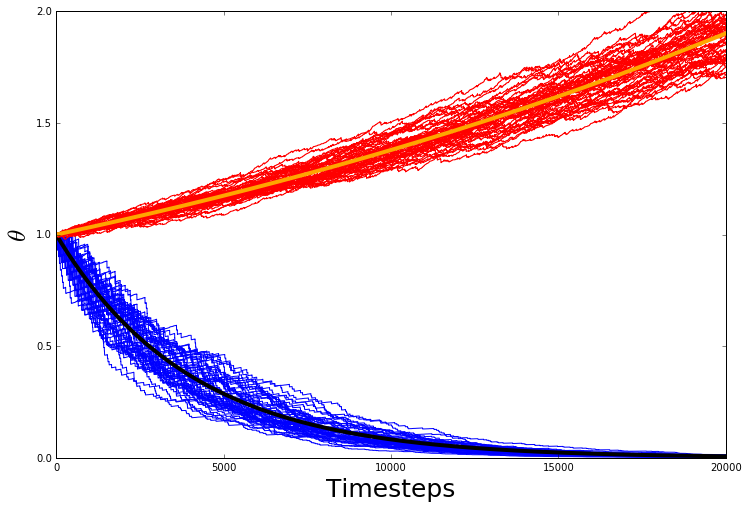

In [29]:

for run in range(nbRun):
    plt.plot(range(nbSteps), theta_history[run], color = 'blue')

plt.plot(range(nbSteps), theta_hist_expected, linewidth = 4.0, color = 'black')

for run in range(nbRun):
    plt.plot(range(nbSteps), theta_history_td[run], color = 'red')
    
plt.plot(range(nbSteps), theta_hist_expected_td, linewidth = 4.0, color = 'orange')
    
plt.ylim(0, 2)
plt.ylabel(r"$\theta$", fontsize = 25)
plt.xlabel("Timesteps", fontsize = 25)
plt.show()

<font size="7">
<center>5-states example</center></font> 

Reward = +1 for every transition

<img src="images/softTerm.png" width="150%" height="150%">

In [30]:
def get_nextState_impRatio(state):
    #right action
    if (np.random.binomial(1,(1.0/3.0))):
        if state==4:
            return (state, 1.0/(1.0/3.0))
        else:
            return (state+1, 1.0/(1.0/3.0))
    else: #left action
        if state==0:
            return (state, 0)
        else:
            return (state-1, 0)  

In [31]:
v_true = np.array([4.,3.,2.,1.,1.])

def msve(theta):
    v_theta = theta[None,:].dot(Phi.T)
    return np.sum(d_mu*interests*(v_true - v_theta)**2)

In [32]:
state = np.random.choice (range(5))
d_mu = np.zeros(5)
for step in range(50000):
    d_mu[state] += 1
    state, _ = get_nextState_impRatio(state)
d_mu[state] +=1

d_mu /= d_mu.sum()

In [33]:
gammas = np.array([0., 1., 1., 1., 0.])
P_pi   = np.array([[0.,1.,0., 0., 0.] ,
                   [0.,0.,1., 0., 0.] ,
                   [0.,0.,0., 1., 0.] ,
                   [0.,0.,0., 0., 1.] ,
                   [0.,0.,0., 0., 1.] 
                    ])

interests = np.array([1.,1.,1.,1.,1.])
Phi       = np.array([[1.,0.,0.] ,
                      [1.,1.,0.] ,
                      [0.,1.,0.] ,
                      [0.,1.,1.] ,
                      [0.,0.,1.] 
                    ])


alpha = 0.001
nbSteps = 50000
nbRun   = 20

## Emphatic td(0) updates


In [34]:
theta_history = np.zeros((nbRun, nbSteps, 3))

for run in range(nbRun):
    state = np.random.choice([0,1,2,3,4])
    e = 0
    F = 0
    imp_ratio = 0
    lambda_t  = 0
    theta = np.zeros(3)
    for step in range(nbSteps):
        F = imp_ratio * gammas[state]* F + interests[state]
        M =  lambda_t*interests[state] + (1 - lambda_t)*F

        nextState, imp_ratio = get_nextState_impRatio(state)    

        e = imp_ratio * (gammas[state]*lambda_t*e + M*Phi[state])

        theta += alpha*(1 + gammas[nextState]*theta.dot(Phi[nextState]) - theta.dot(Phi[state])) * e

        state = nextState

        theta_history[run][step] = theta

In [35]:
msve_errors = np.zeros((nbRun, nbSteps))

for run in range(nbRun):
    for step in range(nbSteps):
        msve_errors[run][step] = msve(theta_history[run][step])

## Deterministic emphatic td(0) 

In [36]:
M = np.diag(np.linalg.inv((np.eye(5) - np.diag(gammas).dot(P_pi.T))).dot(d_mu * interests))
A = Phi.T.dot(M).dot(np.eye(5)).dot(np.eye(5) - P_pi.dot(np.diag(gammas)) ).dot(Phi) 
b = Phi.T.dot(M).dot(np.eye(5)).dot(np.ones(5))

theta_hist_expected = np.zeros((nbSteps,3))
theta = np.zeros(3)
for timestep in range(nbSteps):
    theta += alpha * (b -A.dot(theta))
    theta_hist_expected[timestep] = theta

In [37]:
msve_errors_expected = np.zeros((nbSteps))

for step in range(nbSteps):
    msve_errors_expected[step] = msve(theta_hist_expected[step])

## TD(0)

In [38]:
theta_history_td = np.zeros((nbRun, nbSteps, 3))
gamma = 0.9
for run in range(nbRun):
    state = np.random.choice([0,1,2,3,4])  
    imp_ratio = 0    
    theta = np.zeros(3)
    for step in range(nbSteps):       
        nextState, imp_ratio = get_nextState_impRatio(state)   

        #theta += alpha*imp_ratio*(0 + gammas[nextState]*theta*Phi[nextState] - theta*Phi[state]) * Phi[state]
        theta += alpha*imp_ratio*(1 + gammas[nextState]*theta.dot(Phi[nextState]) - theta.dot(Phi[state])) * Phi[state]

        state = nextState

        theta_history_td[run][step] = theta

In [39]:
msve_errors_td = np.zeros((nbRun, nbSteps))

for run in range(nbRun):
    for step in range(nbSteps):
        msve_errors_td[run][step] = msve(theta_history_td[run][step])

## Deterministic TD(0)

In [40]:
A_td = Phi.T.dot(np.diag(d_mu)).dot(np.eye(5) - (P_pi).dot(np.diag(gammas))).dot(Phi)
b    = (d_mu[:,None] * Phi).sum(axis=0)

theta_hist_expected_td = np.zeros((nbSteps, 3))
theta = np.zeros(3)
for timestep in range(nbSteps):
    theta += alpha * (b -A_td.dot(theta))
    theta_hist_expected_td[timestep] = theta

## Algorithms behaviour

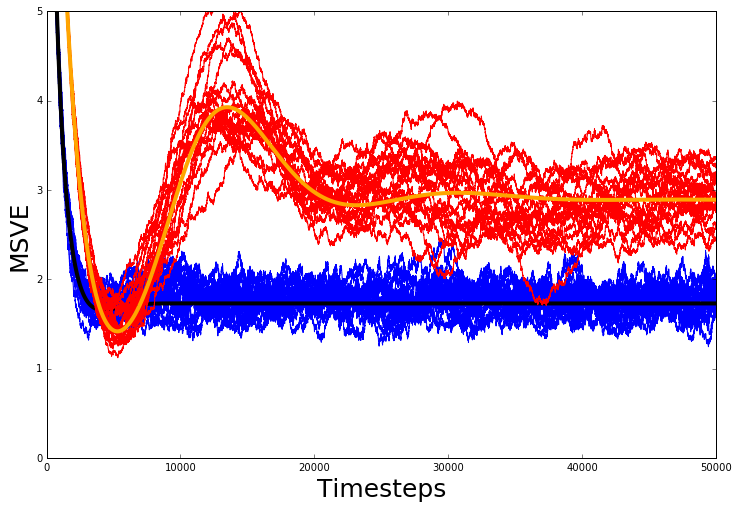

In [41]:
for run in range(nbRun):
    plt.plot(range(nbSteps), msve_errors[run], color = 'blue')

plt.plot(range(nbSteps), msve_errors_expected, linewidth = 4.0, color = 'black')

for run in range(nbRun):
    plt.plot(range(nbSteps), msve_errors_td[run], color = 'red')
    
msve_errors_expected_td = np.zeros((nbSteps))

for step in range(nbSteps):
    msve_errors_expected_td[step] = msve(theta_hist_expected_td[step])
    
plt.plot(range(nbSteps), msve_errors_expected_td, linewidth = 4.0, color = 'orange')
    
plt.ylim(0, 5)
plt.ylabel("MSVE", fontsize = 25)
plt.xlabel("Timesteps", fontsize = 25)
plt.show()